INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple d'utilisation du descripteur FREAK

In [1]:
import cv2  
import matplotlib.pyplot as plt

Lecture de deux images tests et affichage.

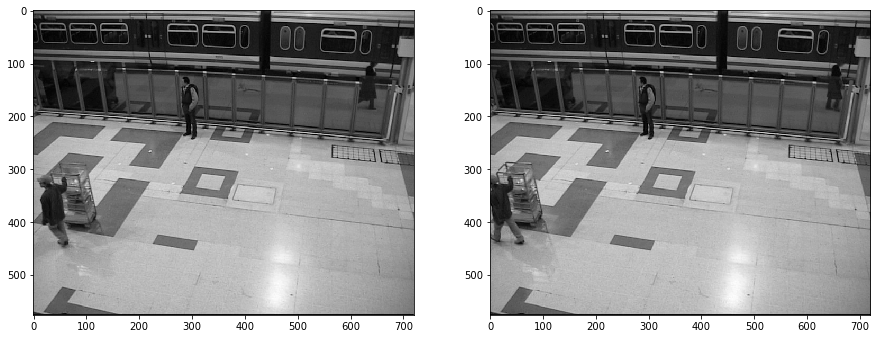

In [2]:
image1 = cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('in000240.jpg',cv2.IMREAD_GRAYSCALE) 

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points clefs sur les images avec ORB (FAST avec orientation).  

In [3]:
orb = cv2.KAZE_create(nfeatures=1000, scoreType=cv2.ORB_FAST_SCORE)
pointsclefs1 = orb.detect(image1,None)
pointsclefs2 = orb.detect(image2,None)

Affichage des points-clefs.

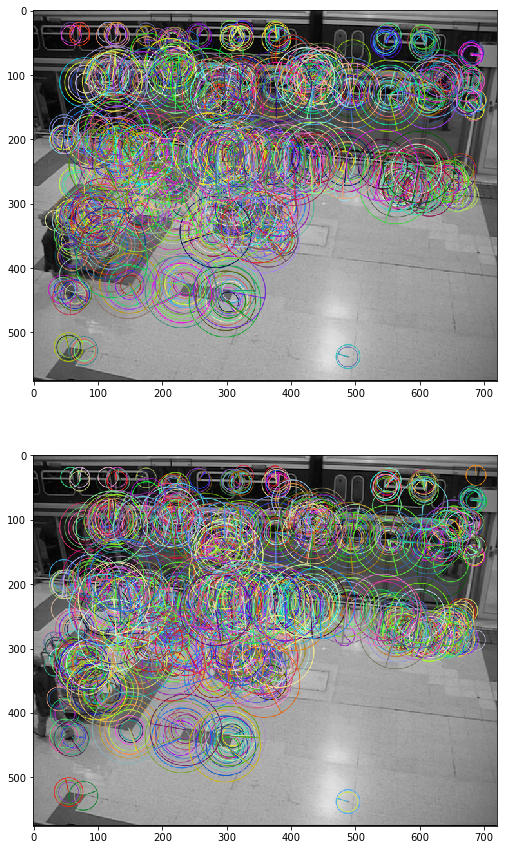

In [4]:
#Le cercle représente l'échelle, et la ligne l'angle.
imageout1 = cv2.drawKeypoints(image1,pointsclefs1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(image2,pointsclefs2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(2, 1, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des descripteurs FREAK sur les deux images.

In [5]:
freakExtractor = cv2.xfeatures2d.FREAK_create()
pointsclefs1,descripteurs1= freakExtractor.compute(image1,pointsclefs1)
pointsclefs2,descripteurs2= freakExtractor.compute(image2,pointsclefs2)

Exemple d'un descripteur FREAK (La chaine binaire est transformée en entiers non-signés).

In [6]:
print(descripteurs1[0])

[ 58  20 253 142  55 229 157 127 214 252 125 181  61  46 177 118 251 214
  65  99 240  34 247  55  28 169 164   9  83 216 117 235 229  36  53 190
 210 120 233 124 114  76  60  46 212  20 245 110 153 172  26   5 240  28
 156  73  16 242  51 188  88  86  32 250]


Affichage des correspondances.

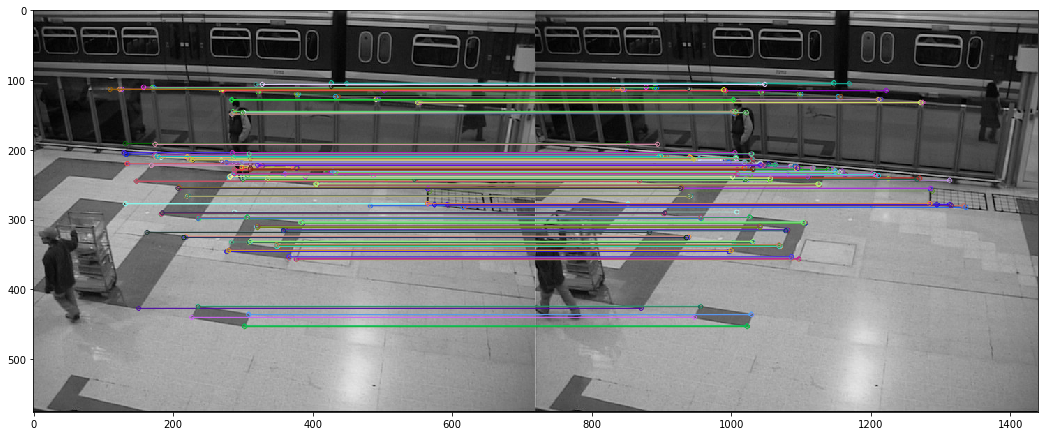

In [7]:
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
correspondances = bf.match(descripteurs1,descripteurs2)
plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(image1,pointsclefs1,image2,pointsclefs2,correspondances, None, flags = 2)
plt.imshow(imageout3)
plt.show()